# Pandas Foundations

## Data Ingestion and Inspection

### Review of Pandas DataFrames

In [15]:
import pandas as pd

df = pd.read_csv('data/world_population.csv', index_col=0)
print(df.head())
print(df.tail())

      Total Population
Year                  
1960      3.034971e+09
1970      3.684823e+09
1980      4.436590e+09
1990      5.282716e+09
2000      6.115974e+09
      Total Population
Year                  
1970      3.684823e+09
1980      4.436590e+09
1990      5.282716e+09
2000      6.115974e+09
2010      6.924283e+09


In [16]:
import numpy as np

# Create array of DataFrame values
np_vals = df.values

# Create new array of base 10 logarithm values
np_vals_log10 = np.log10(np_vals)

# Create array of new DataFrame by passing df to np.log10()
df_log10 = np.log10(df)

# Print original and new data containers
[print(x, 'has type', type(eval(x))) for x in ['np_vals', 'np_vals_log10', 'df', 'df_log10']]

np_vals has type <class 'numpy.ndarray'>
np_vals_log10 has type <class 'numpy.ndarray'>
df has type <class 'pandas.core.frame.DataFrame'>
df_log10 has type <class 'pandas.core.frame.DataFrame'>


[None, None, None, None]

### Building DataFrames from Scratch

In [18]:
list_keys = ['Country', 'Total']
list_values = [['United States', 'Soviet Union', 'United Kingdom'], [1118, 473, 273]]

# Zip the 2 lists together into one list of (key, value) tuples and inspect the list
zipped = list(zip(list_keys, list_values))
print(zipped)

# Build and inspect a dictionary with the zipped list
data = dict(zipped)
print(data)

# Build and inspect a DataFrame from the dictionary
df = pd.DataFrame(data)
print(df)

[('Country', ['United States', 'Soviet Union', 'United Kingdom']), ('Total', [1118, 473, 273])]
{'Country': ['United States', 'Soviet Union', 'United Kingdom'], 'Total': [1118, 473, 273]}
          Country  Total
0   United States   1118
1    Soviet Union    473
2  United Kingdom    273


In [21]:
list_keys = ['a', 'b', 'c', 'd']
list_values = [[1980, 1981, 1982], ['Blondie', 'Christopher Cross', 'Joan Jett'], 
            ['Call Me', 'Arthurs Theme', 'Joan Jett I Love Rock and Roll'], [6, 3, 7]]
df = pd.DataFrame(dict(list(zip(list_keys, list_values))))
# Build a list of labels
list_labels = ['year', 'artist', 'song', 'chart weeks']

# Assign the list of labels to the columns attribute
df.columns = list_labels

print(df)

   year             artist                            song  chart weeks
0  1980            Blondie                         Call Me            6
1  1981  Christopher Cross                   Arthurs Theme            3
2  1982          Joan Jett  Joan Jett I Love Rock and Roll            7


In [24]:
# Make a list of cities' names
cities = ['Manheim', 'Preston park', 'Biglerville', 'Indiana', 'Curwensville', 
          'Crown', 'Harveys lake', 'Mineral springs', 'Cassville', 'Hannastown', 
          'Saltsburg', 'Tunkhannock', 'Pittsburgh', 'Lemasters', 'Great bend']

# Make a string with the value 'PA'
state = 'PA'

# Construct a dictionary
data = {'state': state, 'city': cities}
print(data)

# Construct a DataFrame with broadcasting
df = pd.DataFrame(data)
print(df)

{'state': 'PA', 'city': ['Manheim', 'Preston park', 'Biglerville', 'Indiana', 'Curwensville', 'Crown', 'Harveys lake', 'Mineral springs', 'Cassville', 'Hannastown', 'Saltsburg', 'Tunkhannock', 'Pittsburgh', 'Lemasters', 'Great bend']}
   state             city
0     PA          Manheim
1     PA     Preston park
2     PA      Biglerville
3     PA          Indiana
4     PA     Curwensville
5     PA            Crown
6     PA     Harveys lake
7     PA  Mineral springs
8     PA        Cassville
9     PA       Hannastown
10    PA        Saltsburg
11    PA      Tunkhannock
12    PA       Pittsburgh
13    PA        Lemasters
14    PA       Great bend


### Importing and Exporting Data

In [27]:
# Read in the file, specifying the header and names
df = pd.read_csv('data/world_population.csv', header=0, names=['year', 'population'])
print(df)

   year    population
0  1960  3.034971e+09
1  1970  3.684823e+09
2  1980  4.436590e+09
3  1990  5.282716e+09
4  2000  6.115974e+09
5  2010  6.924283e+09


#### Delimiters, Headers, and Extensions

In [34]:
# Read in the file with correct parameters
df = pd.read_csv('data/messy_stock_data.tsv', delimiter=' ', header=3, comment='#')
print(df.columns)
print(df.head())

# Save the cleaned up DataFrame to a CSV file without the index
df.to_csv('data/clean_stock_data.csv', index=False)

# Save the cleaned up DataFrame to an excel file without the index
df.to_excel('data/clean_stock_data.xlsx', index=False)

Index(['name', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'],
      dtype='object')
     name     Jan     Feb     Mar     Apr     May     Jun     Jul     Aug  \
0     IBM  156.08  160.01  159.81  165.22  172.25  167.15  164.75  152.77   
1    MSFT   45.51   43.08   42.13   43.47   47.53   45.96   45.61   45.51   
2  GOOGLE  512.42  537.99  559.72  540.50  535.24  532.92  590.09  636.84   
3   APPLE  110.64  125.43  125.97  127.29  128.76  127.81  125.34  113.39   

      Sep     Oct     Nov     Dec  
0  145.36  146.11  137.21  137.96  
1   43.56   48.70   53.88   55.40  
2  617.93  663.59  735.39  755.35  
3  112.80  113.36  118.16  111.73  


### Plotting with Pandas

#### Plotting Series using Pandas

In [36]:
# Importing Data
df = pd.read_csv('data/weather_data_austin_2010.csv')
print(df.columns)
print(df.head())

Index(['Temperature', 'DewPoint', 'Pressure', 'Date'], dtype='object')
   Temperature  DewPoint  Pressure            Date
0         46.2      37.5       1.0  20100101 00:00
1         44.6      37.1       1.0  20100101 01:00
2         44.1      36.9       1.0  20100101 02:00
3         43.8      36.9       1.0  20100101 03:00
4         43.5      36.8       1.0  20100101 04:00


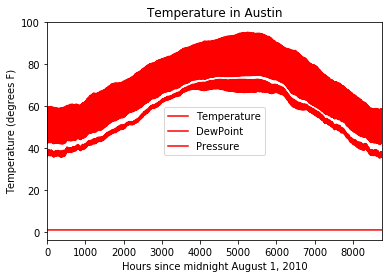

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

# Create a plot with color red
df.plot(color='red')
plt.title('Temperature in Austin')
plt.xlabel('Hours since midnight August 1, 2010')
plt.ylabel('Temperature (degrees F)')
plt.show()